    DataSize  BlockSize  CPUBandwidth  GPUBandwidth  optGPUBandwidth
0        128         64       5.74946      0.022598         0.024490
1        256         64       5.37122      0.044196         0.047262
2        512         64       5.20123      0.087841         0.094758
3       1024         64       5.12262      0.178784         0.193263
4       2048         64       5.08324      0.352723         0.383289
5       4096         64       5.06403      0.723870         0.776933
6       8192         64       5.05261      1.477930         1.872620
7      16384         64       5.04826      2.615610         3.305930
8      32768         64       5.04650      4.056240         5.717510
9      65536         64       5.04219      5.259450         8.649710
10      8192          8       5.05189      0.894928         1.167300
11      8192         16       5.05273      1.220020         1.462160
12      8192         32       5.05245      1.362270         1.634500
13      8192         64       5.05

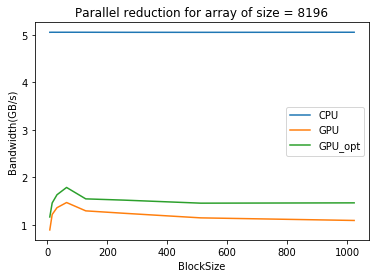

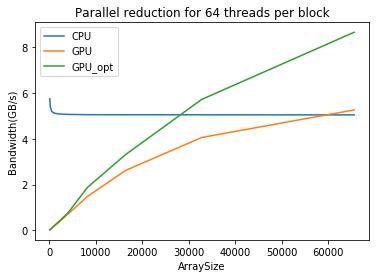

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv("greduction.txt", delimiter = " ", index_col = False)
X = pd.DataFrame(X)
print(X)

VaryData = X.loc[X["BlockSize"] == 64]
VaryData.drop(VaryData.tail(1).index,inplace=True)
Varythreads = X.loc[X["DataSize"] == 8192]
Varythreads.drop(6,inplace = True)
print(VaryData)
print(Varythreads)
plt.title("Parallel reduction for array of size = 8196")
plt.plot(Varythreads["BlockSize"],Varythreads["CPUBandwidth"], label = "CPU")
plt.plot(Varythreads["BlockSize"],Varythreads["GPUBandwidth"], label = "GPU")
plt.plot(Varythreads["BlockSize"],Varythreads["optGPUBandwidth"], label = "GPU_opt")

plt.xlabel("BlockSize")
plt.ylabel("Bandwidth(GB/s)")
plt.legend()
plt.savefig("plots/Varythreads.png")
plt.show()

plt.title("Parallel reduction for 64 threads per block")
plt.plot(VaryData["DataSize"],VaryData["CPUBandwidth"], label = "CPU")
plt.plot(VaryData["DataSize"],VaryData["GPUBandwidth"], label = "GPU")
plt.plot(VaryData["DataSize"],VaryData["optGPUBandwidth"], label = "GPU_opt")

plt.xlabel("ArraySize")
plt.ylabel("Bandwidth(GB/s)")
plt.legend()
plt.savefig("plots/VarySize.png")
plt.show()
